# Load modules

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# Load dataset

In [2]:
data = pd.read_csv("./fake_transactional_data_24.csv")
print(data.shape)
print(data.describe())
print(data.head())

(10148280, 4)
       from_totally_fake_account  monopoly_money_amount
count               1.014828e+07           1.014828e+07
mean                5.080502e+04           1.839348e+01
std                 2.893710e+04           8.612323e+01
min                 1.000000e+03           1.450000e+00
25%                 2.530400e+04           2.650000e+00
50%                 5.078100e+04           6.000000e+00
75%                 7.563300e+04           1.200000e+01
max                 1.009880e+05           1.995000e+03
   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40   
2                    18555.0                   2.40   
3                    18555.0                   4.10   
4                    80792.0                   1.95   

  to_randomly_generated_account not_happened_yet_date  
0                        CINEMA            01/01/2025  
1                         40544        

# Visualisation by transcation location

## Transcation locations word cloud

transaction location set : 
{'WINE_CELLAR', 'HOME_IMPROVEMENT_STORE', 'COCKTAIL_BAR', 'TRAINER_SHOP', 'EXPRESS_SUPERMARKET', 'A_CAFE', 'LOCAL_WATERING_HOLE', 'TOY_SHOP', 'GREENGROCER', 'BUTCHER', 'PET_TOY_SHOP', 'LOCAL_PUB', 'ACCESSORY_SHOP', 'RESTAURANT', 'JEWLLERY_SHOP', 'ROASTERIE', 'COMIC_BOOK_SHOP', 'LUNCH_PLACE', 'G&T_BAR', 'TURKEY_FARM', 'SPORT_SHOP', 'TAKEAWAY_CURRY', 'CHINESE_TAKEAWAY', 'NERDY_BOOK_STORE', 'TOTALLY_A_REAL_COFFEE_SHOP', 'STEAK_HOUSE', 'COFFEE_SHOP', 'CAFE', 'TAKEAWAY', 'SECOND_HAND_BOOKSHOP', 'FASHION_SHOP', 'SEAFOOD_RESAURANT', 'BUTCHERS', 'KIDS_CLOTHING_SHOP', 'RESTAURANT_VOUCHER', 'DVD_SHOP', 'A_LOCAL_COFFEE_SHOP', 'ELECTRONICS_SHOP', 'LOCAL_BOOKSHOP', 'WE_HAVE_BEAN_WEIGHTING', 'VIDEO_GAME_STORE', 'HIPSTER_COFFEE_SHOP', 'KIDS_ACTIVITY_CENTRE', 'A_SUPERMARKET', 'THE_SUPERMARKET', 'FASHIONABLE_SPORTSWARE_SHOP', 'PUB', 'CHINESE_RESTAURANT', 'INDIAN_RESTAURANT', 'LARGE_SUPERMARKET', 'TECH_SHOP', 'DIY_STORE', 'LUNCH_VAN', 'CLOTHES_SHOP', 'SANDWICH_SHOP', 'COOKSHO

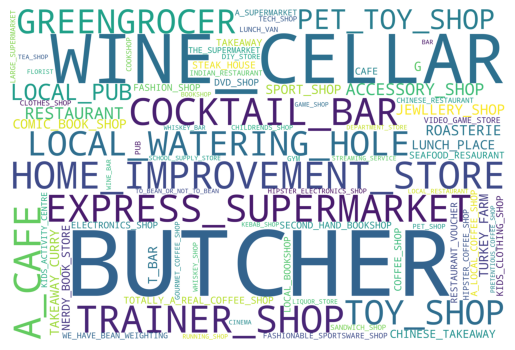

In [19]:
transaction_locations = data[["to_randomly_generated_account"]].drop_duplicates().reset_index()
location_set = set()

for i in range(len(transaction_locations)):
    location = transaction_locations.loc[i, 'to_randomly_generated_account']
    if location.isdigit():
        continue
    location_set.add(location)

print("transaction location set : ")
print(location_set)

wordCloudString = ""
for location in location_set:
    wordCloudString += location + "/"
wordcloud = WordCloud(background_color="white", width=3000, height=2000).generate(wordCloudString)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig("../img/1.png")
plt.show()

## Statistics on the total amount of transactions at each location

In [4]:
type_dict = {"1": "food", "2": "entertainment", "3": "fashion", "4": "sports", "5": "bar", "6": "book&video",
             "7": "supermarket",
             "8": "other", "9": "person"}
location_type_dict = {"COOKSHOP": "1", "CHINESE_RESTAURANT": "1", "PRETENTIOUS_COFFEE_SHOP": "1", "RESTAURANT": "1",
                      "CHINESE_TAKEAWAY": "1", "BUTCHERS": "1", "SEAFOOD_RESAURANT": "1", "LOCAL_RESTAURANT": "1",
                      "KEBAB_SHOP": "1", "TAKEAWAY": "1", "INDIAN_RESTAURANT": "1", "TOTALLY_A_REAL_COFFEE_SHOP": "1",
                      "LUNCH_VAN": "1", "LUNCH_PLACE": "1", "A_CAFE": "1", "ROASTERIE": "1", "HIPSTER_COFFEE_SHOP": "1",
                      "BUTCHER": "1", "TURKEY_FARM": "1", "STEAK_HOUSE": "1", "TAKEAWAY_CURRY": "1", "CAFE": "1",
                      "TEA_SHOP": "1", "RESTAURANT_VOUCHER": "1", "SANDWICH_SHOP": "1", "A_LOCAL_COFFEE_SHOP": "1",
                      "GREENGROCER": "1", "GOURMET_COFFEE_SHOP": "1", "COFFEE_SHOP": "1", "DIY_STORE": "2",
                      "KIDS_ACTIVITY_CENTRE": "2", "TOY_SHOP": "2", "GAME_SHOP": "2", "CINEMA": "2",
                      "VIDEO_GAME_STORE": "2", "ACCESSORY_SHOP": "3", "JEWLLERY_SHOP": "3", "CLOTHES_SHOP": "3",
                      "KIDS_CLOTHING_SHOP": "3", "FASHION_SHOP": "3", "FASHIONABLE_SPORTSWARE_SHOP": "4",
                      "RUNNING_SHOP": "4", "SPORT_SHOP": "4", "GYM": "4", "TRAINER_SHOP": "4", "WINE_BAR": "5",
                      "LOCAL_PUB": "5", "WHISKEY_BAR": "5", "G&T_BAR": "5", "LOCAL_WATERING_HOLE": "5",
                      "WINE_CELLAR": "5", "LIQUOR_STORE": "5", "PUB": "5", "WHISKEY_SHOP": "5", "COCKTAIL_BAR": "5",
                      "BAR": "5", "LOCAL_BOOKSHOP": "6", "COMIC_BOOK_SHOP": "6", "STREAMING_SERVICE": "6",
                      "DVD_SHOP": "6", "SECOND_HAND_BOOKSHOP": "6", "NERDY_BOOK_STORE": "6", "BOOKSHOP": "6",
                      "A_SUPERMARKET": "7", "EXPRESS_SUPERMARKET": "7", "THE_SUPERMARKET": "7", "DEPARTMENT_STORE": "7",
                      "LARGE_SUPERMARKET": "7", "TO_BEAN_OR_NOT_TO_BEAN": "1", "HIPSTER_ELECTRONICS_SHOP": "8",
                      "CHILDRENDS_SHOP": "8", "HOME_IMPROVEMENT_STORE": "8", "ELECTRONICS_SHOP": "8", "FLORIST": "8",
                      "PET_SHOP": "8", "SCHOOL_SUPPLY_STORE": "8", "PET_TOY_SHOP": "8", "WE_HAVE_BEAN_WEIGHTING": "1",
                      "TECH_SHOP": "8"}
dict_keys = location_type_dict.keys()

location_type_costs = {}
location_frequency = {}
for key in location_type_dict.keys():
    location_type_costs[key] = 0
    location_frequency[key] = 0

if "location_type" in data:
    pass
else:
    data.insert(data.shape[1], "location_type", "0")

type_costs = [0 for i in range(9)]

for row in range(len(data)):
    list_index = 8
    location = data.loc[row, "to_randomly_generated_account"]
    if location in dict_keys:
        location_type_costs[location] = location_type_costs[location] + data.loc[row, "monopoly_money_amount"]
        location_frequency[location] = location_frequency[location] + 1
        data.loc[row, "location_type"] = location_type_dict[location]
        list_index = int(data.loc[row, "location_type"]) - 1
    else:
        data.loc[row, "location_type"] = "9"

    type_costs[list_index] = type_costs[list_index] + data.loc[row, "monopoly_money_amount"]

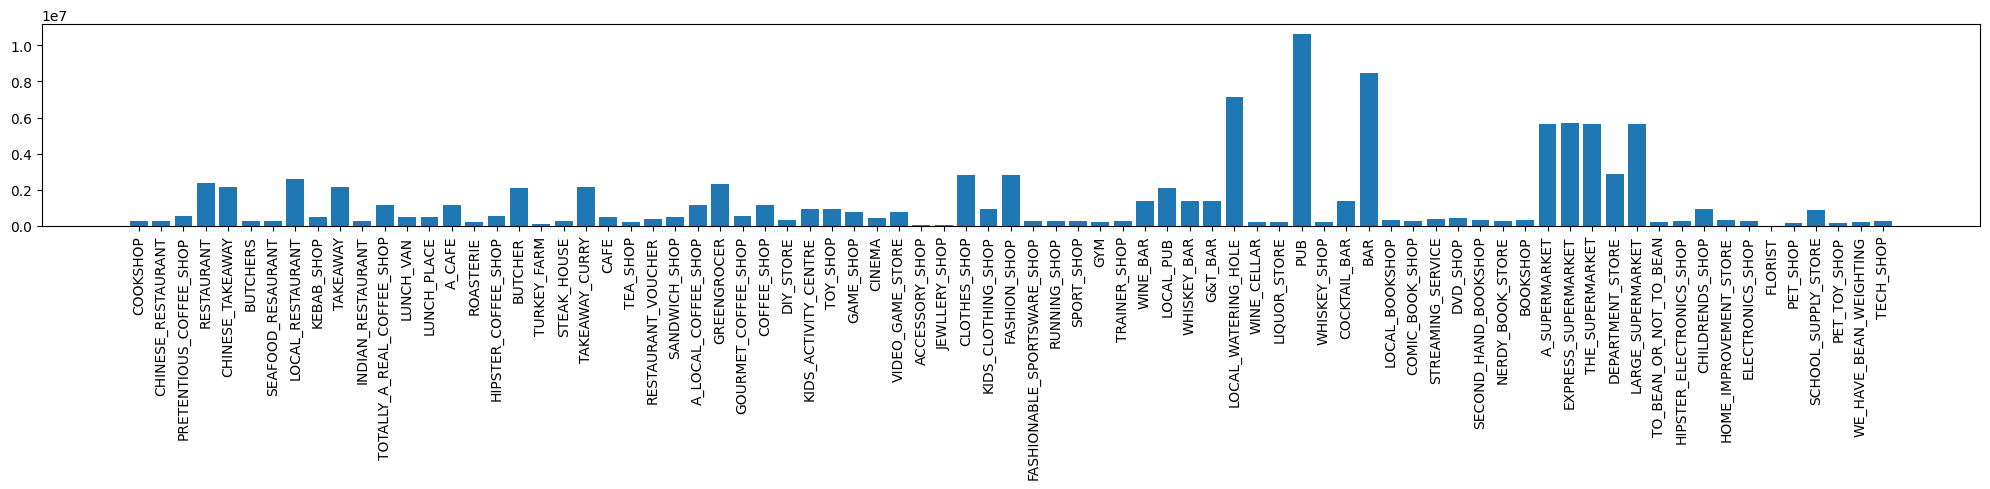

In [20]:
_x = []
_y = []
for key, value in location_type_costs.items():
    _x.append(key)
    _y.append(value)
plt.figure(figsize=(20, 5))
plt.bar(_x, _y)
plt.xticks(_x, _x, rotation=90)
plt.tight_layout()
plt.savefig("../img/2.png")
plt.show()

## Statistics on the number of transactions at each location

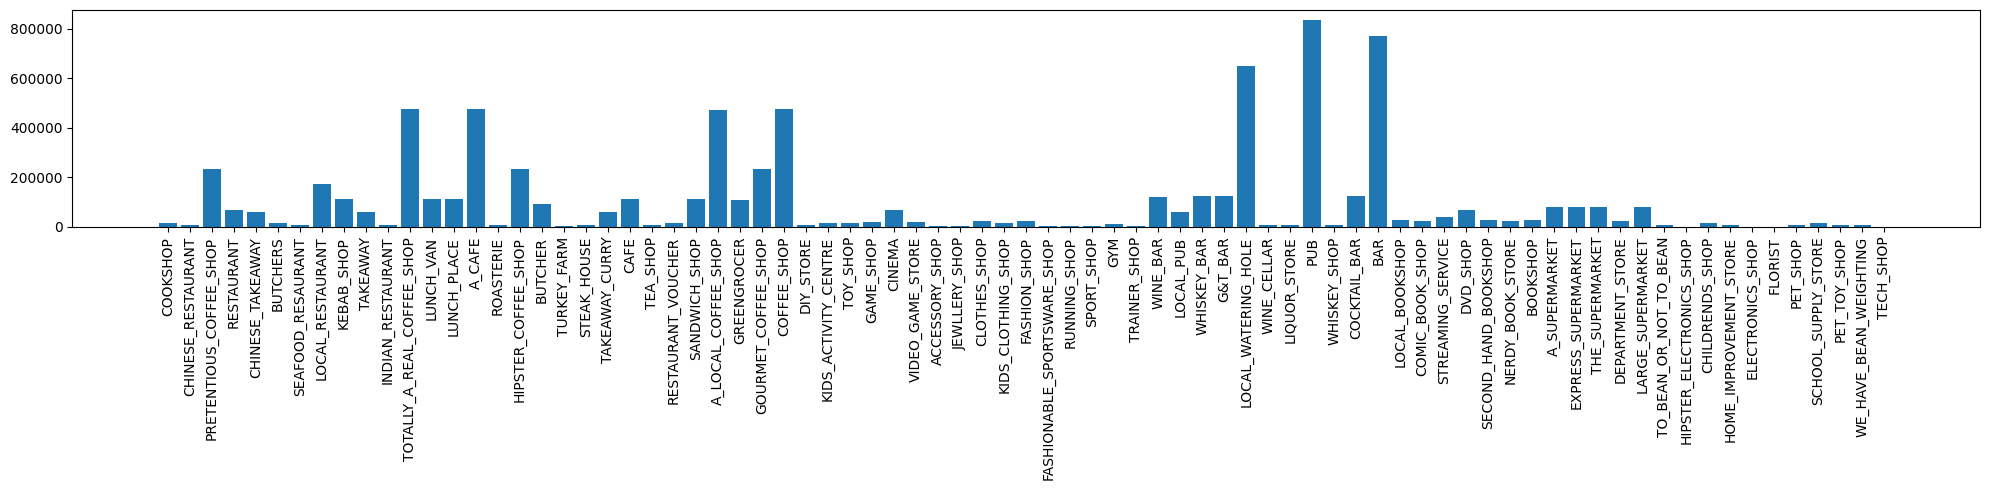

In [21]:
_x = []
_y = []
for key, value in location_frequency.items():
    _x.append(key)
    _y.append(value)
plt.figure(figsize=(20, 5))
plt.bar(_x, _y)
plt.xticks(_x, _x, rotation=90)
plt.tight_layout()
plt.savefig("../img/3.png")
plt.show()

## Statistics on the average amount per transaction at each location

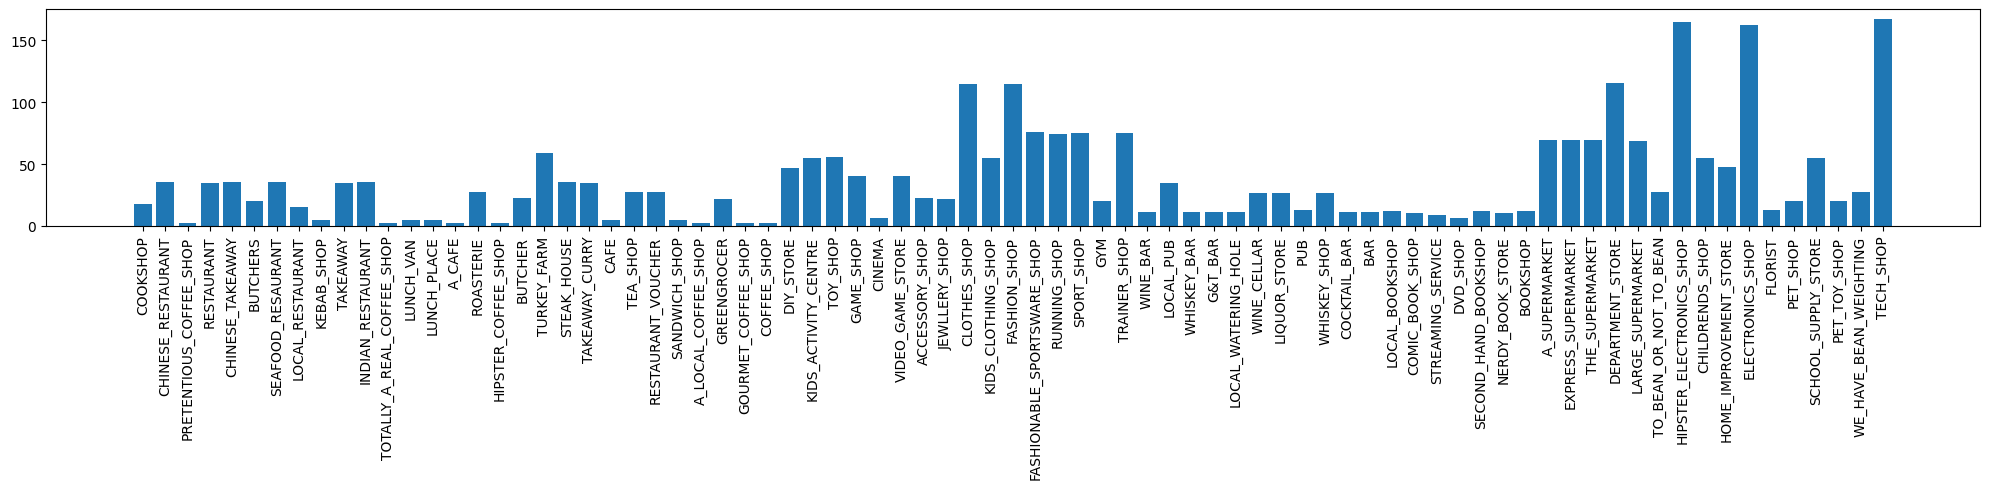

In [22]:
_x = []
_y = []
for key, value in location_frequency.items():
    _x.append(key)
    _y.append(location_type_costs[key] / value)
plt.figure(figsize=(20, 5))
plt.bar(_x, _y)
plt.xticks(_x, _x, rotation=90)
plt.tight_layout()
plt.savefig("../img/4.png")
plt.show()

## Categorisation of trading location and statistics on the total value of transactions under each category

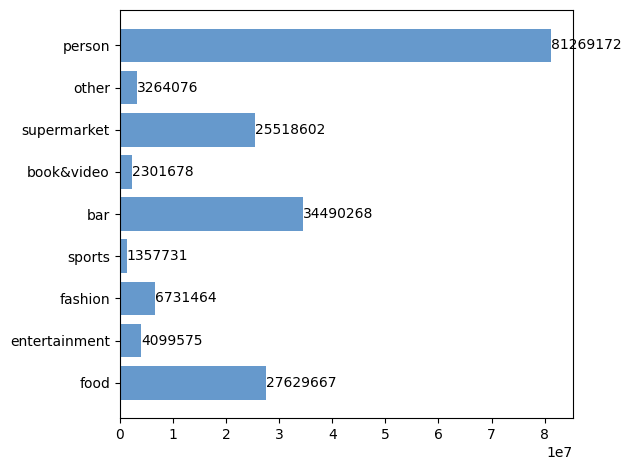

In [23]:
names = ["food", "entertainment", "fashion", "sports", "bar", "book&video", "supermarket", "other", "person"]

fig, ax = plt.subplots()
b = ax.barh(range(len(names)), type_costs, color='#6699CC')

for rect in b:
    w = rect.get_width()
    ax.text(w, rect.get_y() + rect.get_height() / 2, '%d' % int(w), ha='left', va='center')

ax.set_yticks(range(len(names)))
ax.set_yticklabels(names)
plt.tight_layout()
plt.savefig("../img/5.png")
plt.show()

# Visualisation by transcation time

## Modify the dataset

In [14]:
df = data
df['not_happened_yet_date']=pd.to_datetime(df['not_happened_yet_date'], format="%d/%m/%Y")
df['day_of_week']=df['not_happened_yet_date'].dt.dayofweek
print(df.head())

   from_totally_fake_account  monopoly_money_amount  \
0                    10371.0                   4.00   
1                    88339.0                   2.40   
2                    18555.0                   2.40   
3                    18555.0                   4.10   
4                    80792.0                   1.95   

  to_randomly_generated_account not_happened_yet_date location_type  \
0                        CINEMA            2025-01-01             2   
1                         40544            2025-01-01             9   
2                         85149            2025-01-01             9   
3           HIPSTER_COFFEE_SHOP            2025-01-01             1   
4                         18555            2025-01-01             9   

   day_of_week  
0            2  
1            2  
2            2  
3            2  
4            2  


## Total transaction amount by date

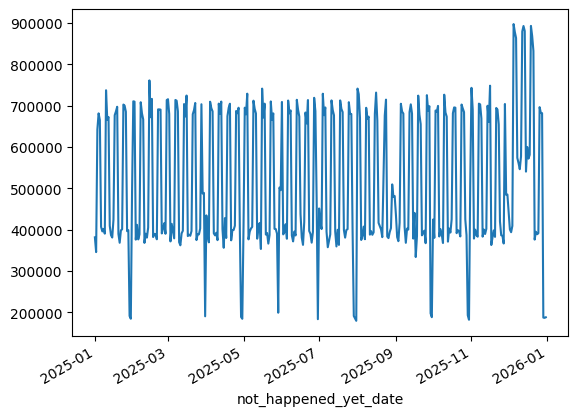

In [24]:
df_date=df.drop(['from_totally_fake_account','to_randomly_generated_account','day_of_week'],axis=1)
df_date=(df_date.groupby(['not_happened_yet_date'])
         .agg({'sum','count'})
         .sort_values(['not_happened_yet_date'])
         .rename(columns={'monopoly_money_amount':'transaction'})
        )
ax = df_date['transaction']['sum'].plot()
fig = ax.get_figure()
fig.savefig('../img/6.png')

## Transaction count by date

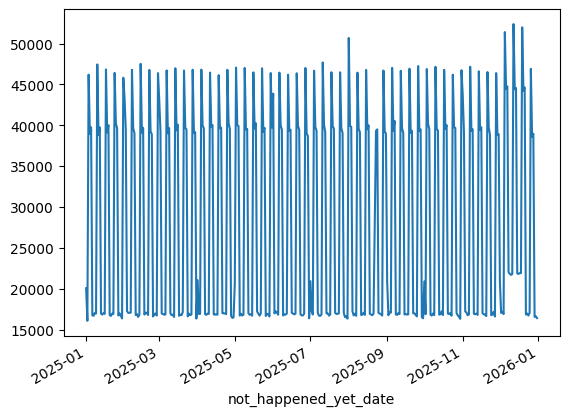

In [25]:
ax = df_date['transaction']['count'].plot()
fig = ax.get_figure()
fig.savefig('../img/7.png')

## Total transaction amount by weekday

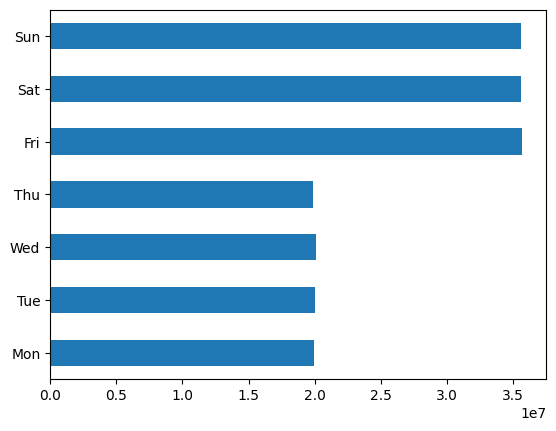

In [26]:
week_title=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
df_week=df.drop(['from_totally_fake_account','to_randomly_generated_account','not_happened_yet_date'],axis=1)
df_week=(df_week.groupby(['day_of_week'])
         .agg({'sum','count'})
         .sort_values(['day_of_week'])
         .rename(columns={'monopoly_money_amount':'transaction'})
        )
df_week.index=week_title
ax = df_week['transaction']['sum'].plot.barh()
fig = ax.get_figure()
fig.savefig('../img/8.png')

## Transaction count by weekday

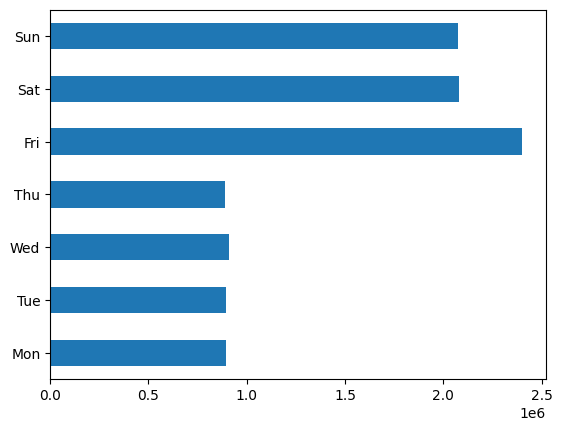

In [27]:
ax = df_week['transaction']['count'].plot.barh()
fig = ax.get_figure()
fig.savefig('../img/9.png')

## Statistics on trading location on Fridays and weekends

In [31]:
dict_keys = location_type_dict.keys()

weekends_costs = {}
weekends_frequency = {}
for key in location_type_dict.keys():
    weekends_costs[key] = 0
    weekends_frequency[key] = 0


for row in range(len(df)):
    if df.loc[row, "day_of_week"] == 5 or df.loc[row, "day_of_week"] == 6 or df.loc[row, "day_of_week"] == 7:
        location = data.loc[row, "to_randomly_generated_account"]
        if location in dict_keys:
            weekends_costs[location] = weekends_costs[location] + df.loc[row, "monopoly_money_amount"]
            weekends_frequency[location] = weekends_frequency[location] + 1

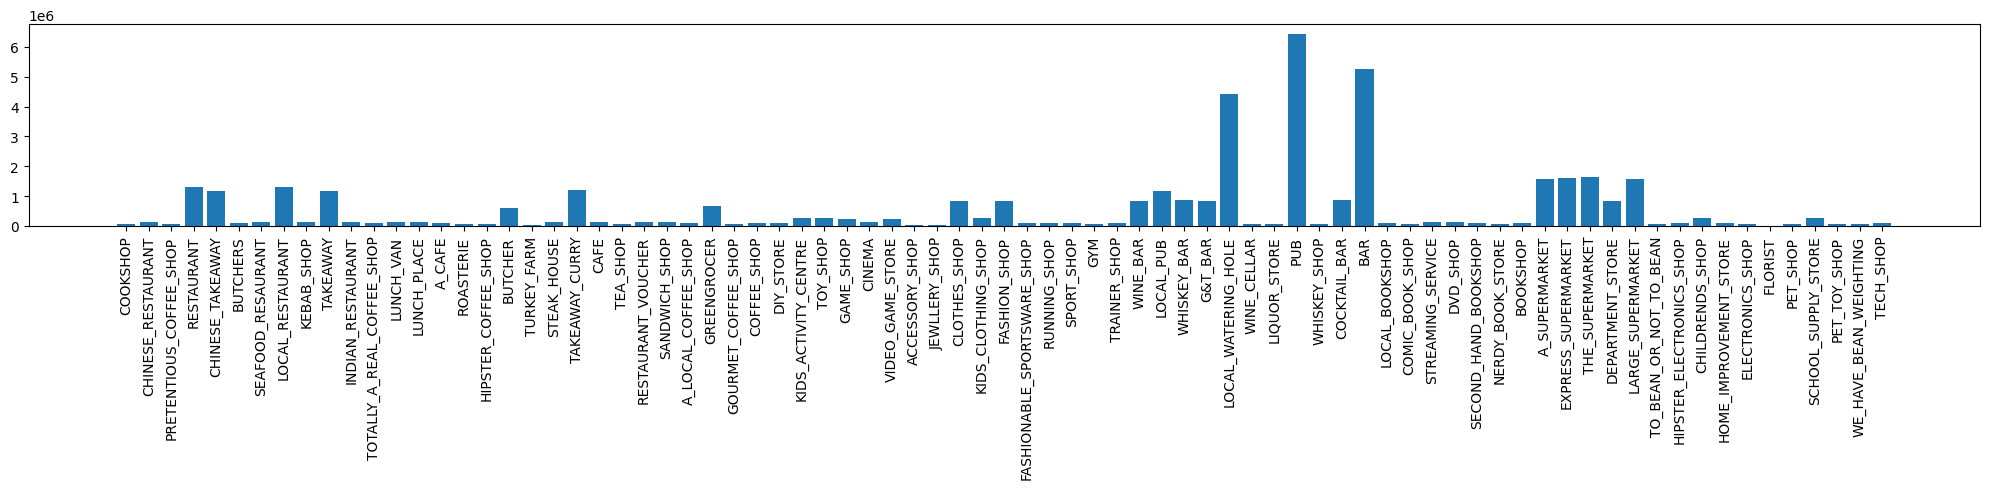

In [41]:
_x = []
_y = []
for key, value in weekends_costs.items():
    _x.append(key)
    _y.append(value)
plt.figure(figsize=(20, 5))
plt.bar(_x, _y)
plt.xticks(_x, _x, rotation=90)
plt.tight_layout()
plt.savefig("../img/10.png")
plt.show()

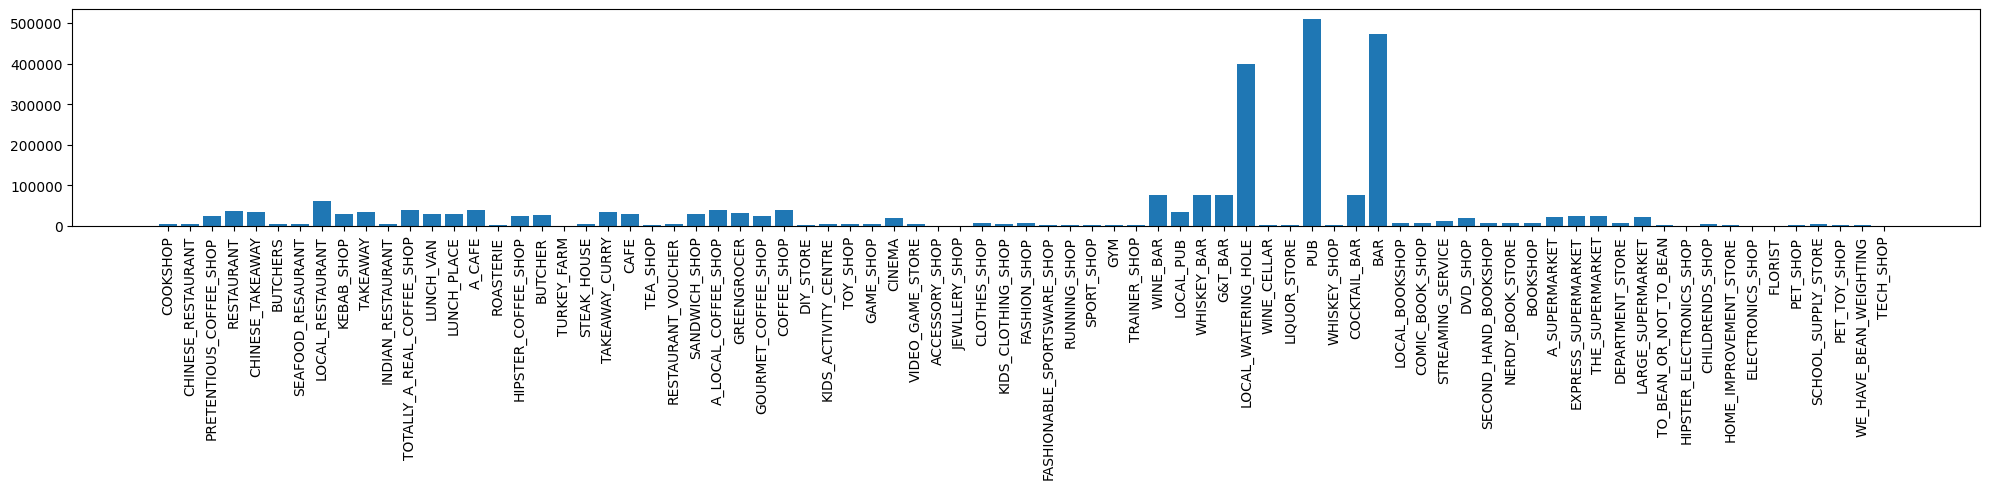

In [42]:
_x = []
_y = []
for key, value in weekends_frequency.items():
    _x.append(key)
    _y.append(value)
plt.figure(figsize=(20, 5))
plt.bar(_x, _y)
plt.xticks(_x, _x, rotation=90)
plt.tight_layout()
plt.savefig("../img/11.png")
plt.show()